In [5]:
#Ans no1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('/content/dataset.csv')


In [6]:
x=df.drop('target',axis=1)
y=df['target']

In [7]:
from sklearn.preprocessing import StandardScaler
slr=StandardScaler()
x_scal=slr.fit_transform(x)

In [8]:
df.head(25)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [9]:
# Ans no2

from sklearn.model_selection import train_test_split

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x_scal, y, test_size=0.3, random_state=42)

# Print the shapes of the resulting sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Training set shape: (212, 13) (212,)
Test set shape: (91, 13) (91,)


In [10]:
# Ans no3
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf=RandomForestClassifier( n_estimators=100, max_depth=10)

clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=10)

In [11]:
y_pred=clf.predict(X_test)

In [12]:
#Ans no4
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.8131868131868132
Precision: 0.8235294117647058
Recall: 0.84
F1 Score: 0.8316831683168315


['cp', 'thalach', 'oldpeak', 'ca', 'thal']


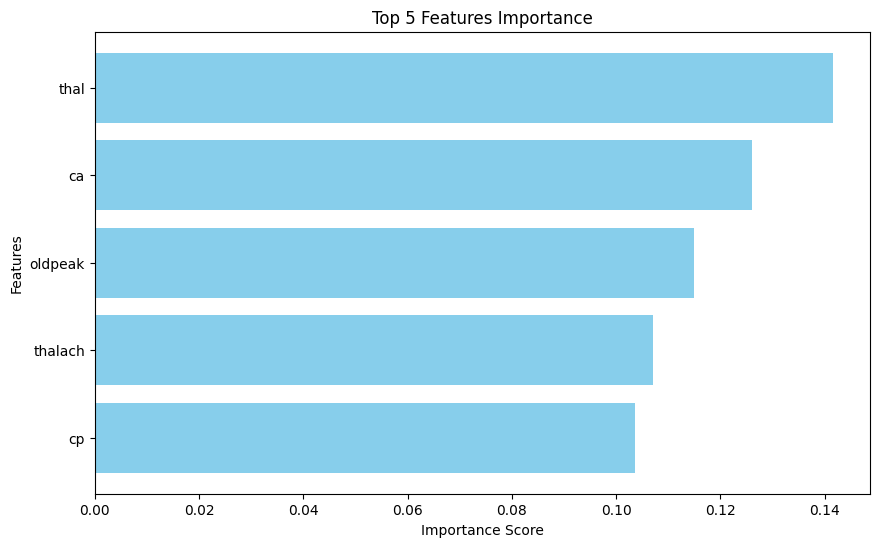

In [13]:
#Ans no5
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances
importances = clf.feature_importances_

# Get the indices of the top 5 features
top_indices = importances.argsort()[-5:]

# Get the feature names corresponding to the top 5 features
l=[]

# Iterate over columns and print column names with indices
for i, column_name in enumerate(df.columns):
  for j in top_indices:
    if j==i:
      l.append(column_name)

print(l)
          
top_features_indices = l

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.barh(top_features_indices, importances[top_indices], color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Top 5 Features Importance')
plt.show()


In [14]:
# Ans no6

param = {
       'n_estimators' :[10,50,100],
       'max_depth':[5,10,20],
       'min_samples_leaf': [1,2,3,4],
       'min_samples_split':[0.1,1,10],
}
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(clf,param_grid=param,cv=5)
grid.fit(x_scal,y)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ut

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=10),
             param_grid={'max_depth': [5, 10, 20],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [0.1, 1, 10],
                         'n_estimators': [10, 50, 100]})

In [15]:
#Ans no7
grid.best_params_

{'max_depth': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 0.1,
 'n_estimators': 50}

In [16]:
clf=RandomForestClassifier( n_estimators=100, max_depth=5,min_samples_leaf=4,min_samples_split=0.1)

clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=4, min_samples_split=0.1)

In [17]:
y_pred=clf.predict(X_test)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.8461538461538461
Precision: 0.8461538461538461
Recall: 0.88
F1 Score: 0.8627450980392156


In [27]:
top_indices 

array([ 9,  2,  7, 12, 11])

In [59]:
import numpy as np
import matplotlib.pyplot as plt

# Select two most important features
feature1_index = top_indices[-1]  # Index of the most important feature
feature2_index = top_indices[-2]  # Index of the second most important feature



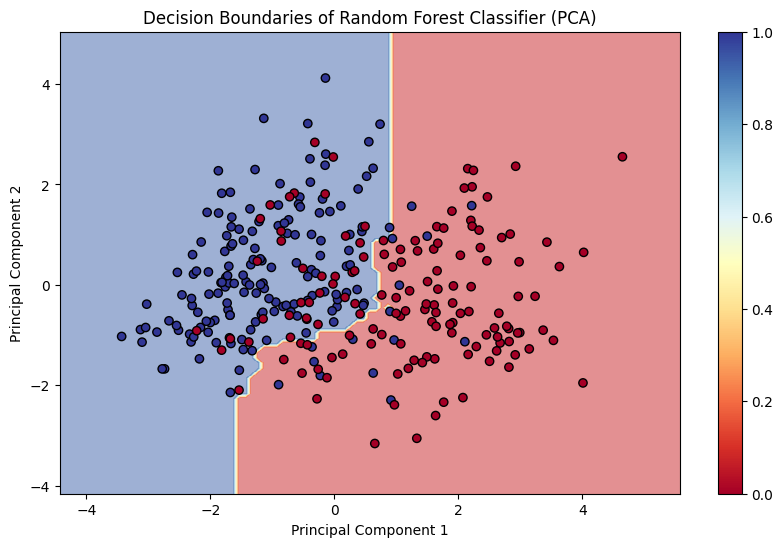

In [61]:
from sklearn.decomposition import PCA

# Instantiate PCA with 2 components
pca = PCA(n_components=2)

# Fit and transform the feature data to the reduced dimensional space
X_pca = pca.fit_transform(x_scal)

# Fit the RandomForestClassifier on the transformed da
clf.fit(X_pca, y)

# Define meshgrid for decision boundary plotting
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Make predictions on the meshgrid
mesh_predictions = clf.predict(np.c_[xx.ravel(), yy.ravel()])
mesh_predictions = mesh_predictions.reshape(xx.shape)

# Plot the decision boundaries and scatter plot
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, mesh_predictions, alpha=0.5, cmap=plt.cm.RdYlBu)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor='black')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Decision Boundaries of Random Forest Classifier (PCA)')
plt.colorbar()
plt.show()
